# Explorando el Titanic a través del Análisis de Datos

El análisis de datos es una disciplina que implica la exploración, limpieza y modelado de información para revelar patrones y tendencias. A través de herramientas estadísticas y visuales, buscamos extraer conocimientos significativos que respalden decisiones informadas en diversos ámbitos.

## Herramientas Visuales: Gráficos y Tablas

En este viaje de descubrimiento, nos apoyaremos en gráficos y tablas como herramientas cruciales. Estos elementos visuales no solo hacen que los datos sean comprensibles, sino que también permiten identificar patrones visuales y comunicar hallazgos de manera efectiva. En la travesía del Titanic, estos recursos nos ayudarán a contar la historia detrás de los números.

## Presentando el Proyecto

En este proyecto, utilizaremos dos librerías fundamentales:

- **Pandas:** Facilitará la manipulación y análisis de datos tabulares.
- **Seaborn:** Brindará la capacidad de crear visualizaciones impactantes.

A través de estas herramientas, exploraremos el dataset del Titanic, desentrañando misterios y respondiendo preguntas clave sobre los factores que influyeron en la supervivencia durante este evento histórico.


#Instalamos librerias e importamos base de datos

In [149]:
import pandas as pd

import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")

#### Detalle de Contenido del Columnas del Dataset

*TITANIC Dataset*
* *Pclass* Clase del pasajero (1 = 1st; 2 = 2nd; 3 = 3rd)
* *Survived* Si el pasajero sobrevivió o no (0 = No; 1 = Si)
* *Name:* Nombre
* *Sex:* Sexo
* *Age:* Edad
* *Sibsp:* Número de hermanos / cónyuges a bordo
* *Parch:* Número de padres / niños a bordo
* *Ticket:* Numero de Ticket 
* *Fare:* Tarifa de pasajero (libra esterlina)
* *Cabin:* Cabina
* *Embarked:* Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)

-Mostramos los primeros 5 elementos de la tabla, tomados en cuenta por el Id de los pasajeros

In [150]:
df = pd.read_csv('titanic.csv', index_col = 'PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Obtenemos la información de nuestra tabla para analizar sus datos

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### Analizamos:
- Datos nulos(864): Cabin(687) y Age(177)
- object(5): Name, Sex, Ticket, Cabin, Embarked 
- int(4): Survived, Pclass,SibSp,Parch
- float64(2): Age, Fare

#### Utilizamos la función describe para Analizar la base de datos

In [152]:
df[["Survived", "Pclass", "SibSp", "Parch", "Age", "Fare"]].describe()

,Survived,Pclass,SibSp,Parch,Age,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,29.699118,32.204208
std,0.486592,0.836071,1.102743,0.806057,14.526497,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,20.125000,7.910400
50%,0.000000,3.000000,0.000000,0.000000,28.000000,14.454200
75%,1.000000,3.000000,1.000000,0.000000,38.000000,31.000000
max,1.000000,3.000000,8.000000,6.000000,80.000000,512.329200


#### Analizamos datos de tipo numéricos:
- El porcentaje de personas que abordaron en primera clase es menor al de las demás.
- La mayoría de las personas fueron con almenos 1 cónyuge o hermano a bordo.
- Al menos una persona abordó con 8 hermanos o cónyuges.
- La edad promedio de las personas fue de 29.6 años, la edad mínima fue de menos de un año y la máxima 80
- Personas ingresaron sin abonar, Personas abonaron por el contrario 512 libras

In [153]:
df[["Name", "Sex", "Ticket", "Cabin", "Embarked"]].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


#### Analizamos datos no numéricos:
- Se encuentran más hombres que mujeres
- 577 hombres, 314 mujeres(con una diferencia de 263)
- El tiquet 347082 se emitió un total de 7 veces
- El puerto de embarque más popular fue el de Southampton, con un total de 644 personas embarcadas

#### Realizamos un Análisis Estadístico de los datos que consideremos útiles

In [154]:
df["Age"].mean()

29.69911764705882

In [155]:
df["Age"].mode()

0    24.0
Name: Age, dtype: float64

In [156]:
df["Age"].median()

28.0

In [157]:
df["Age"].std()

14.526497332334044

In [158]:
df["Age"].max()

80.0

- Edad promedio: 29 
- Edad Moda: 24 
- Edad Mediana: 28 
- Edad Desviación estandar: 14.5
- Edad Máxima: 80 años

In [159]:
df["Fare"].mean()

32.204207968574636

In [160]:
df["Fare"].mode()

0    8.05
Name: Fare, dtype: float64

In [161]:
df["Fare"].median()

14.4542

In [162]:
df["Fare"].std()

49.693428597180905

In [163]:
df["Fare"].max()

512.3292

- Tarifa promedio: 32
- Tarifa Moda: 8.05
- Tarifa Mediana: 14.4
- Tarifa Desviación estandar: 49.7
- Tarifa Máxima: 512 

#### Usamos la función value_counts con cada columna categórica y hacemos un análisis de los valores únicos y sus frecuencias según veamos necesario.

In [164]:
df.value_counts(["Pclass"])

Pclass
3         491
1         216
2         184
Name: count, dtype: int64

#### Total de pasajeros por clase:
- 3er Clase: 491 pasajeros
- 2da Clase: 184 pasajeros
- 1ra Clase: 216 pasajeros

In [165]:
df.value_counts(["Survived"])

Survived
0           549
1           342
Name: count, dtype: int64

#### Hubo más fallecidos que sobrevivientes
- Fallecidos: 549
- Sobrevivientes: 342

In [166]:
df.value_counts(["Sex"])

Sex   
male      577
female    314
Name: count, dtype: int64

#### Encontramos una mayor cantidad de Hombres
- Hombres: 577
- Mujeres: 314

In [167]:
df.value_counts(["Age"])

Age  
24.00    30
22.00    27
18.00    26
30.00    25
28.00    25
         ..
20.50     1
14.50     1
12.00     1
0.92      1
80.00     1
Name: count, Length: 88, dtype: int64

#### Se observa un mayor número de pasajeros con la edad de 24 años

In [168]:
df.value_counts(["Fare"])

Fare   
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.1125      1
8.1375      1
17.4000     1
8.1583      1
7.7292      1
Name: count, Length: 248, dtype: int64

In [169]:
df.value_counts(["Embarked"])

Embarked
S           644
C           168
Q            77
Name: count, dtype: int64

#### Se embarcó más veces en Southampton
- Southampton: 644 embarques
- Cherbourg: 168 embarques
- Queenstown: 77 embarques

## Análizamos relaciones entre Columnas

In [170]:
df.groupby("Pclass")["Survived"].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

#### Sobrevivieron 136 de 1ra clase, 87 de 2da clase y 119 de 3era clase

In [171]:
df.groupby("Sex")["Survived"].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

#### Sobrevivieron más mujeres(233) que hombres(109)

In [172]:
df.groupby(["Survived", "Embarked"]) ["Name"].count()

Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
Name: Name, dtype: int64

#### Sobrevivientes por puertos de embarque
- De 644 personas que embarcaron en Southampton: 427 Fallecieron y 217 Sobrevivieron 
- De 168 personas que embarcaron en Cherbourg: 75 Fallecieron y 93 Sobrevivieron
- De 77 personas que embarcaron en Queenstown: 47 Fallecieron y 30 Sobrevivieron

#### Identificamos datos faltantes y Gestionamos una solución al respecto

In [173]:
df.isna()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


In [174]:
df.drop( columns = "Cabin", inplace = True)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


#### ELiminamos la columna "Cabin" debido a que estaba compuesta en su mayoría por registros nulos

In [176]:
df['Age'] = df['Age'].fillna(df['Age'].median())

df.isna()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False


#### Los valores nulos faltantes, se encontraban en las edades de algunos pasajeros, en este caso resolvimos transformando esos valores faltantes en el promedio de las edades, ya que este accionar modifica lo menos posible los cálculos realizados con los demás datos, pero no es el unico accionar posible

## Mediante Diferentes Gráficos analizaremos relaciones entre valores y datos que nos aporten información útil

### Gráfico de barras

Es una forma de representar gráficamente un conjunto de datos mediante barras rectangulares de longitud proporcional a los valores representados. Los gráficos de barras pueden ser usados para comparar cantidades de una variable. Las barras pueden orientarse horizontal y verticalmente.


<Axes: xlabel='Pclass', ylabel='Survived'>

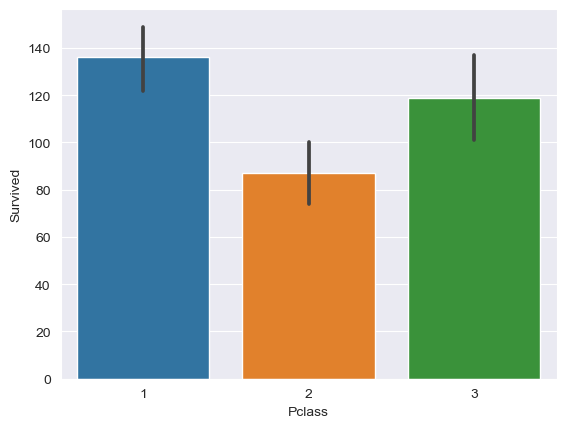

In [177]:
# Total de sobrevivientes por clase
sns.barplot(x= "Pclass", y = "Survived", estimator = np.sum, data= df)

<Axes: xlabel='Pclass', ylabel='Survived'>

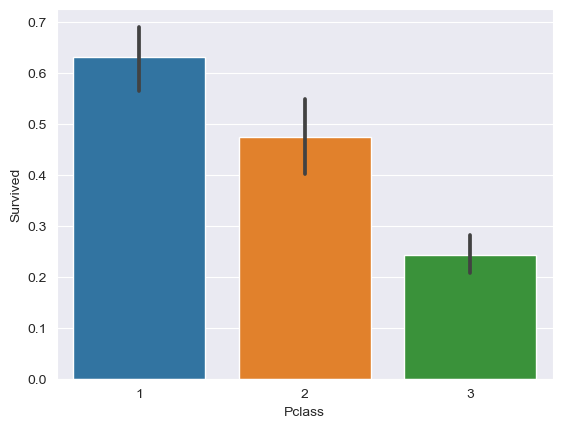

In [178]:
# Promedio de sobrevivientes por clase
sns.barplot(x= "Pclass", y = "Survived", estimator = np.mean, data= df)

<Axes: xlabel='Pclass', ylabel='Survived'>

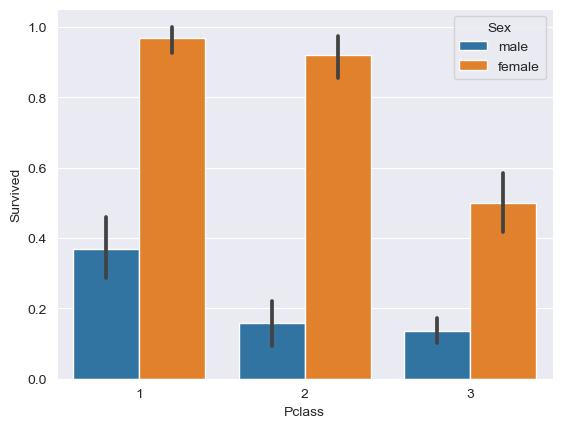

In [179]:
# Promedio de sobrevivientes por clase
# Discriminando por sexo
sns.barplot(x= "Pclass", y = "Survived", hue = "Sex" , estimator = np.mean, data= df)

### Histograma

Es una representación gráfica de una variable en forma de barras, donde la superficie de cada barra es proporcional a la frecuencia de los valores representados. Sirven para obtener una "primera vista" general de la distribución de la variable.

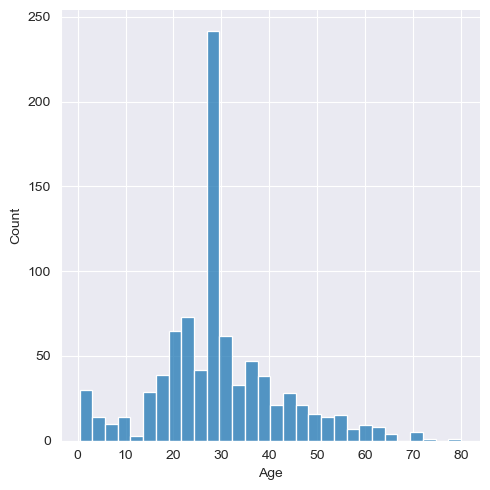

In [180]:
# Distribucion de la edad de los pasajeros
sns.displot(df["Age"], kde = False)

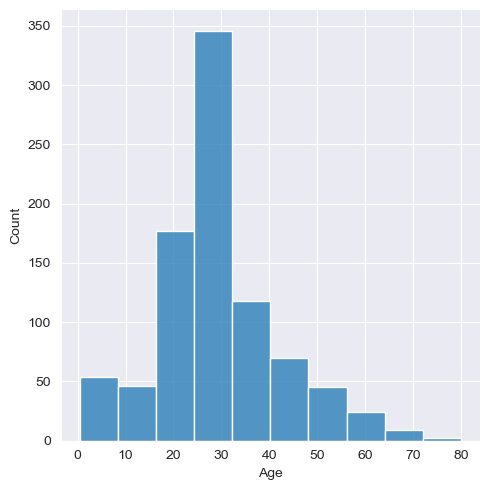

In [181]:
# Distribucion de la edad de los pasajeros
# Agrupando edades de a 10
sns.displot(df["Age"], bins = 10, kde = False)

### Diagrama de densidad

Este gráfico es una variación de un Histograma que usa el suavizado de cerner para trazar valores, permitiendo distribuciones más suaves al suavizar el ruido.

<Axes: xlabel='Age', ylabel='Density'>

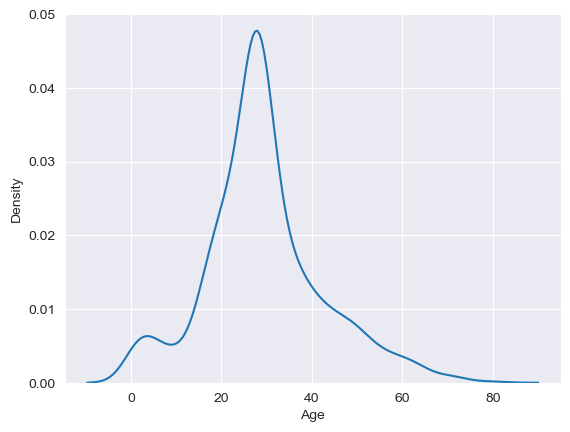

In [182]:
# Distribucion de la edad de los pasajeros
sns.kdeplot(df["Age"])

<Axes: xlabel='Age', ylabel='Density'>

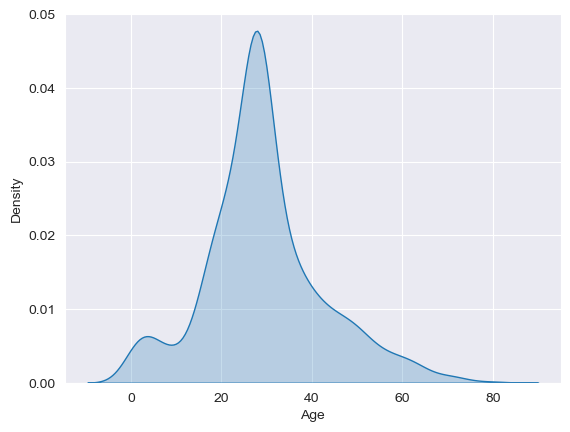

In [183]:
sns.kdeplot(df["Age"], fill=True)

### Diagrama de Dispersión

Permite ver la relación entre dos variables. Un diagrama de dispersión puede sugerir varios tipos de correlaciones entre las variables con un intervalo de confianza determinado. 

Se aplica con variables continuas. 

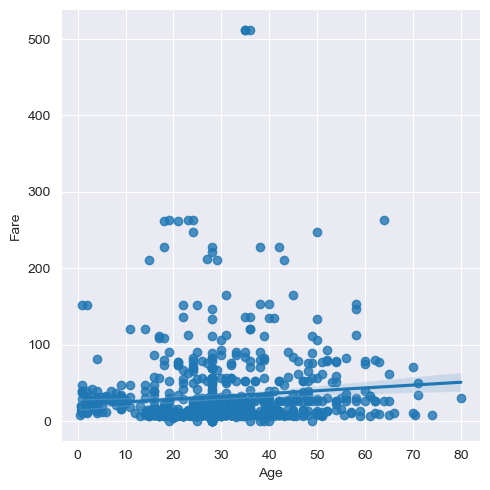

In [184]:
# Relacion entre la variable age y fare
sns.lmplot(x="Age", y="Fare", data=df)

### Boxplot

Un diagrama de caja es un método estandarizado para representar gráficamente una serie de datos numéricos a través de sus cuartiles. De esta manera, se muestran a simple vista la mediana y los cuartiles de los datos, y también pueden representarse sus valores atípicos.

<Axes: ylabel='Age'>

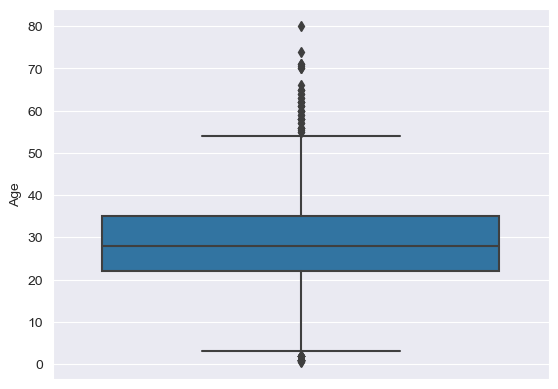

In [185]:
# Boxplot Age
sns.boxplot(y = "Age", orient="v", data = df)

<Axes: xlabel='Pclass', ylabel='Fare'>

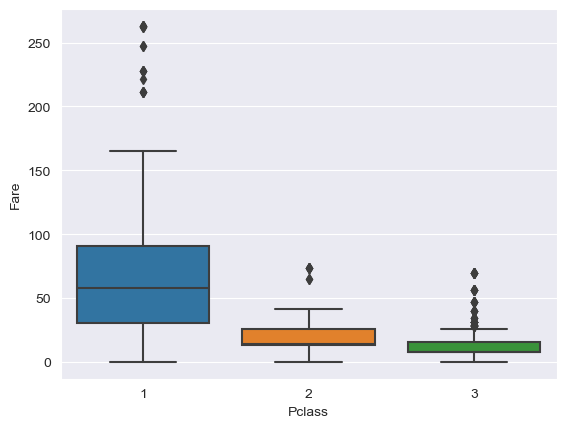

In [186]:
# Boxplot Fare por clase
# Eliminamos valor super atipico para mejorar la visualizacion
sns.boxplot(x = "Pclass", y = "Fare", orient="v", data = df[df["Fare"]< 300])

<Axes: xlabel='Pclass', ylabel='Fare'>

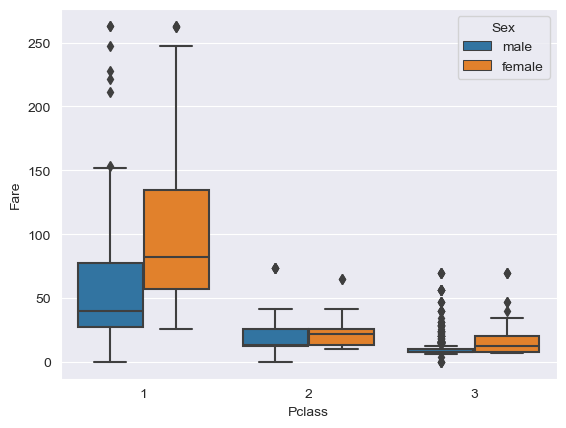

In [187]:
# Boxplot Fare por clase
# Eliminamos valor super atipico para mejorar la visualizacion
# Discriminando por sexo
sns.boxplot(x = "Pclass", y = "Fare", orient="v", hue = "Sex",
            data = df[df["Fare"]< 300])

### Violin

Es similar a un diagrama de caja, con la adición de un diagrama de densidad de grano rotado en cada lado.

<Axes: xlabel='Pclass', ylabel='Fare'>

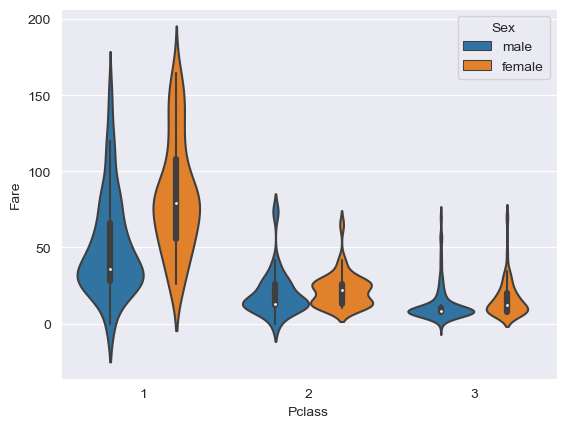

In [188]:
# Violin Fare por clase
# Eliminamos valor atipico para mejorar la visualizacion
# Discriminando por sexo
sns.violinplot(x = "Pclass", y = "Fare", orient="v", hue = "Sex",
            data = df[df["Fare"]< 200])